In [35]:
import numpy as np
import os
import glob
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [36]:

datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15, 
    rescale=1./255 ,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True
)
train_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web',
    target_size=(299, 299),
    batch_size=32,
    shuffle=True,
    subset='training'
     )


val_ds = datagen.flow_from_directory(
    r'E:\datasets\dataset_web', 
    target_size=(299, 299),
    shuffle=True,
    batch_size=32,
    subset='validation'
    )

Found 11214 images belonging to 13 classes.
Found 1969 images belonging to 13 classes.


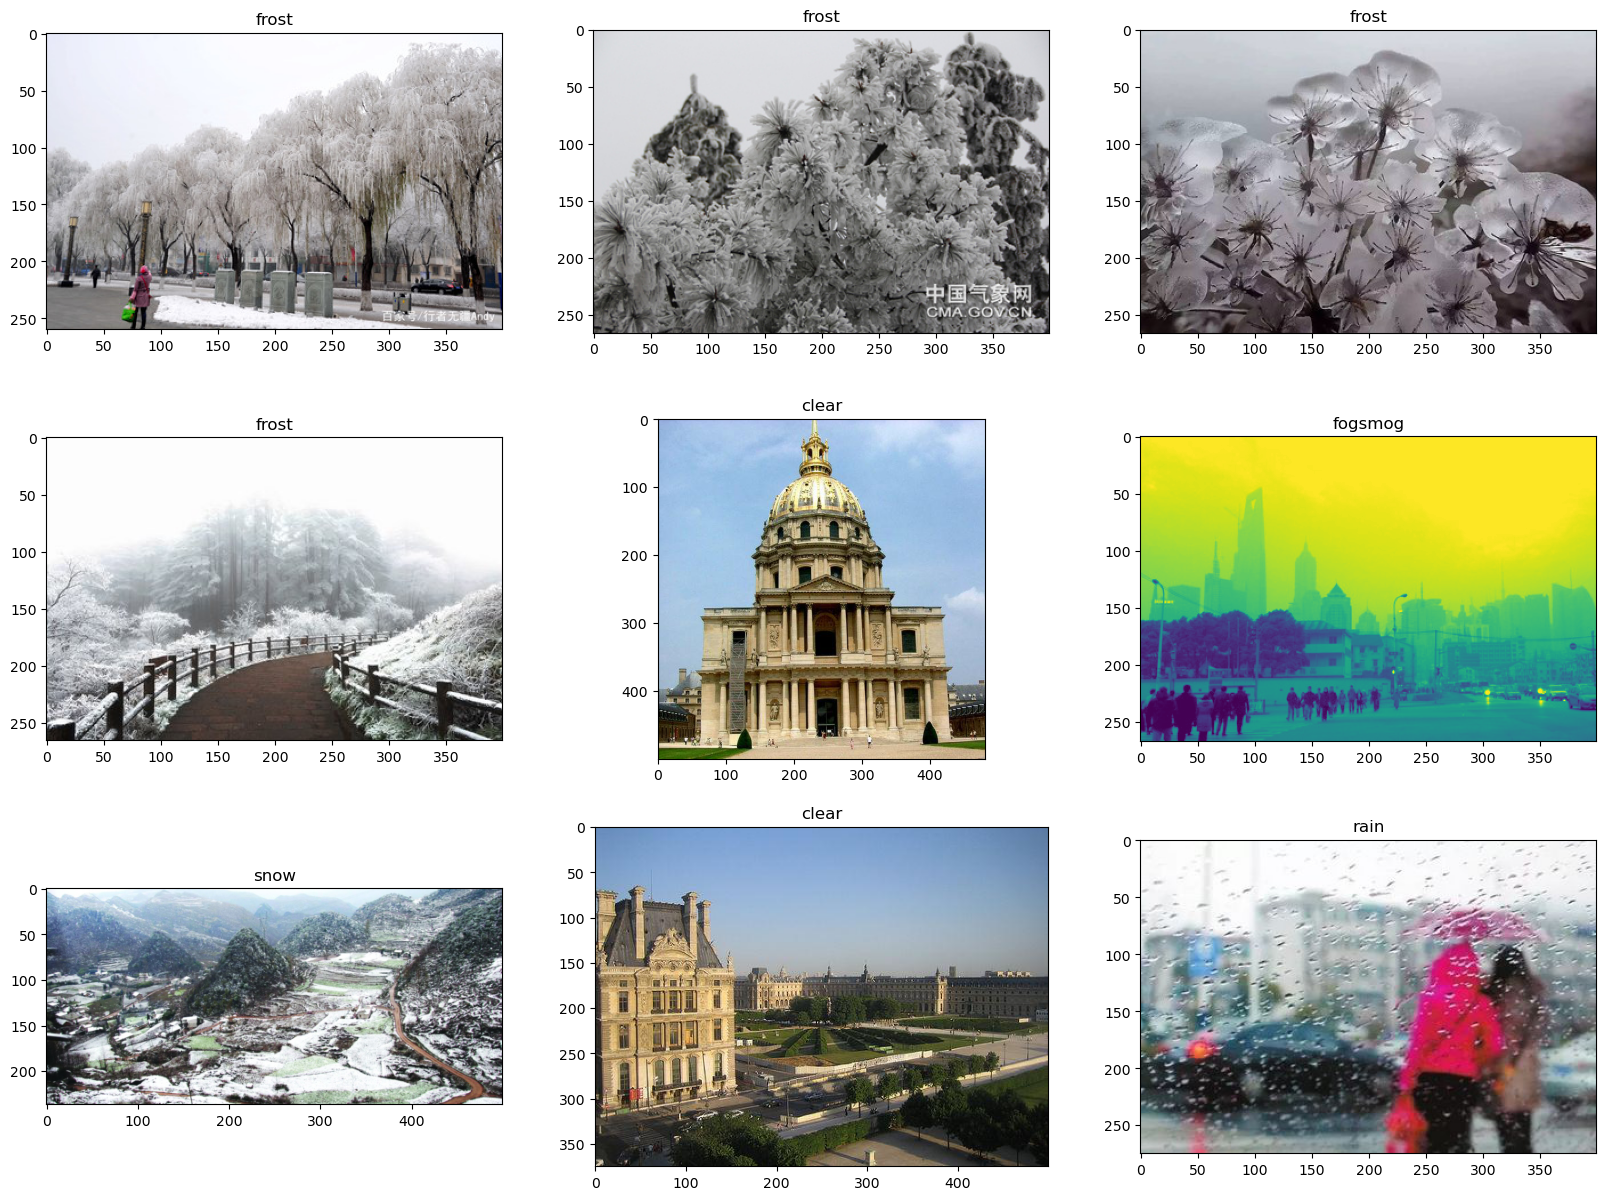

In [37]:


fig, axes = plt.subplots(3,3, figsize=(20, 15))

indices_classes = {v: k for k, v in train_ds.class_indices.items()} #Словарь классов
images_classes = list(zip(train_ds.filepaths, [indices_classes[k] for k in train_ds.classes])) #Разныце пути для картинок
for ax in axes.reshape(-1):
    random_image = random.choice(images_classes)
    img = mpimg.imread(random_image[0])
    ax.set_title(random_image[1])
    ax.imshow(img)

In [38]:
def print_loss(result): #График Loss
    plt.figure(figsize=(15,10))
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

In [39]:

IMG_SHAPE = (299, 299, 3)
base_model =tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_shape=IMG_SHAPE,
    pooling=None,
    classifier_activation="softmax",
)
base_model.trainable = False

In [42]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01,
)
model = Sequential([
    base_model,
    layers.Dense(299, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(13, activation = 'softmax')
])

model.compile(optimizer=adam_optimizer,
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 1000)              22910480  
                                                                 
 dense_18 (Dense)            (None, 299)               299299    
                                                                 
 dropout_12 (Dropout)        (None, 299)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               38400     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 13)                1677      
                                                                 
Total params: 23,249,856
Trainable params: 339,376
Non

In [ ]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=10,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                             min_delta=0,
                                                             patience=2,
                                                             restore_best_weights=True)])
results = model.evaluate(val_ds)


Epoch 1/10
351/351 [==============================] - 1679s 5s/step - loss: 0.1965 - accuracy: 0.4399 - val_loss: 0.1652 - val_accuracy: 0.4992
Epoch 2/10
351/351 [==============================] - 1885s 5s/step - loss: 0.1619 - accuracy: 0.5340 - val_loss: 0.1458 - val_accuracy: 0.5744
Epoch 3/10
351/351 [==============================] - 2486s 7s/step - loss: 0.1541 - accuracy: 0.5655 - val_loss: 0.1534 - val_accuracy: 0.5510
Epoch 4/10
 47/351 [===>..........................] - ETA: 3:47:51 - loss: 0.1543 - accuracy: 0.5639

In [22]:
test_results = {}
    
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.42881
Test Accuracy: 47.97%


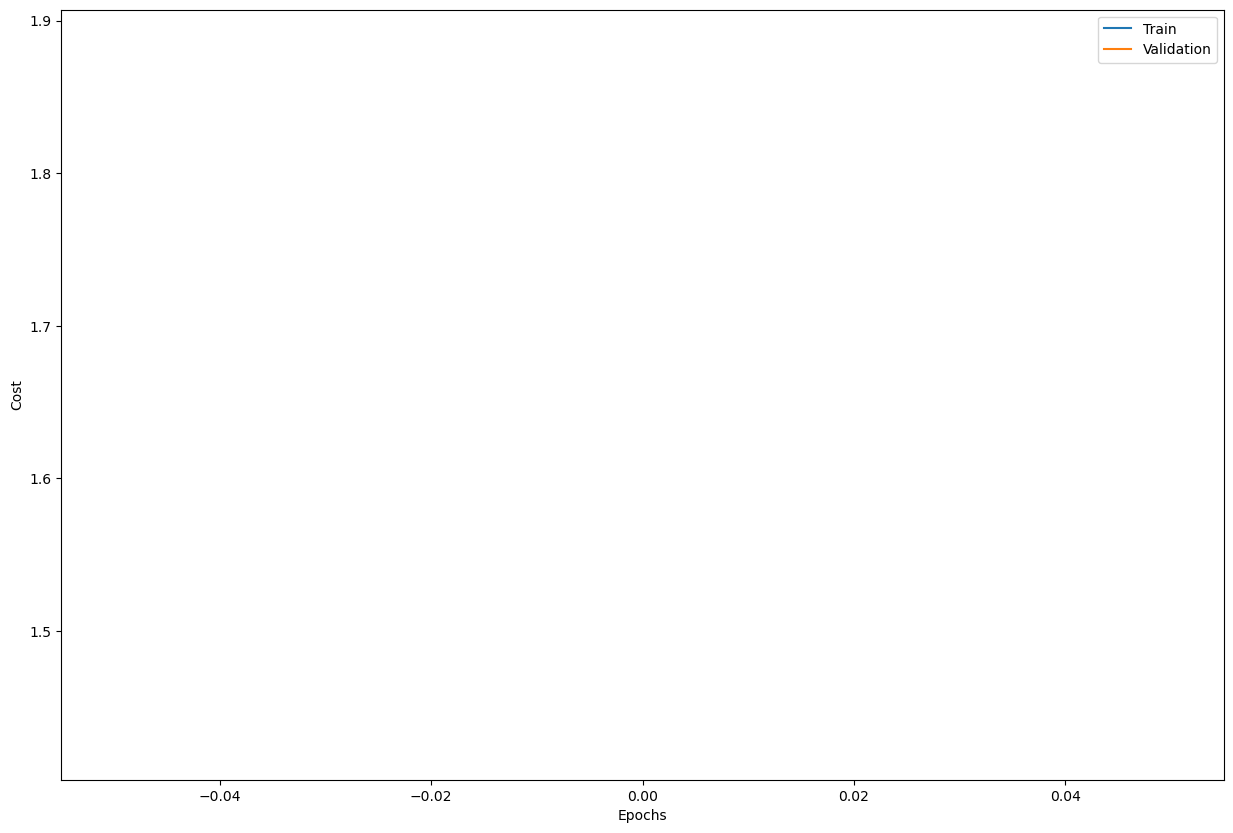

In [23]:
print_loss(history)

In [ ]:
####model.save(r'C:\machine learning\first\first_ResNet50V2_model')